# Basics of Feature Selection with Python
In machine learning, feature selection is the process of choosing a subset of input features that contribute the most to the output feature for use in model construction. Feature selection is substantially important if we have datasets with high dimensionality (i.e., large number of features). High-dimensional datasets are not preferred because they have lengthy training time and have high risk of overfitting. Feature selection helps to mitigate these problems by selecting features that have high importance to the model, such that the data dimensionality can be reduced without much loss of the total information. Some benefits of feature selection are:
- Reduce training time
- Reduce the risk of overfitting
- Potentially increase model's performance 
- Reduce model's complexity such that interpretation becomes easier

The objective of this notebook is to introduce the fundamental of feature selection in Python. I have tried to keep the notebook as basic as possible so that even newbies can understand every phase of it.  If you think this notebook gives something valuable to your journey to data science, PLEASE UPVOTE. It will keep me motivated.

We will discuss three key methods to perform feature selection together with their implementation in Python:
1. [Filter methods](#section 1.0.)
2. [Wrapper methods](#section 2.0.)
3. [Embedded methods](#section 3.0.)

Before we get started, let's import the necessary Python libraries.

In [190]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

We will do some demonstrations on how to implement each feature selection method in Python. To do that, we use Iris flower dataset. We import the Iris flower dataset from Scikit-learn by calling the following:

In [191]:
# Load Iris dataset from Scikit-learn
from sklearn.datasets import load_iris

# Create input and output features
feature_names = load_iris().feature_names
X_data = pd.DataFrame(load_iris().data, columns=feature_names)
y_data = load_iris().target

# Show the first five rows of the dataset
X_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<a id='section 1.0.'></a>

# 1.0. Filter Methods
In filter methods, features are selected independently from any machine algorithms. Filter methods generally use a specific criteria, such as scores in statistical test and variances, to rank the importance of individual features. Filter methods have some advantages:
- Because of their independency to the selection of machine learning algorithms, they can be used as the input of any machine learning models. 
- They are generally effective in computation time.

The main weakness of filter methods is that they do not consider the relationships among features. That's why they are mainly used as the pre-processing step of any feature selection pipeline. We will discuss three types of filter selection methods:
1. [ANOVA F-value](#section 1.1.)
2. [Variance Threshold](#section 1.2.)
3. [Mutual Information](#section 1.3.)

<a id='section 1.1.'></a>

## 1.1. ANOVA F-value
ANOVA F-value method estimates the degree of linearity between the input feature (i.e., predictor) and the output feature. A high F-value indicates high degree of linearity and a low F-value indicates low degree of linearity. The main disadvantage of using ANOVA F-value is it only captures linear relationships between input and output feature. In other words, any non-linear relationships cannot be detected by F-value. 

We can use Scikit-learn to calculate ANOVA F-value. First, we need to load the library. Scikit-learn has two functions to calculate F-value:
- **f_classif**, which calculate F-value between input and output feature for classification task
- **f_regression**, which calculate F-value between input and output feature for classification task

We will use **f_classif** because the Iris dataset entails classification task.

In [192]:
# Import f_classif from Scikit-learn
from sklearn.feature_selection import f_classif

Then, we calculate F-value for each input feature in the Iris dataset by calling the following:

In [193]:
# Create f_classif object to calculate F-value
f_value = f_classif(X_data, y_data)

# Print the name and F-value of each feature
for feature in zip(feature_names, f_value[0]):
    print(feature)

('sepal length (cm)', 119.26450218449871)
('sepal width (cm)', 49.16004008961098)
('petal length (cm)', 1180.1611822529776)
('petal width (cm)', 960.0071468018025)


Let's visualize the results by creating a bar chart:

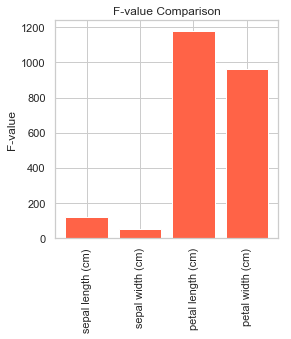

In [194]:
# Create a bar chart for visualizing the F-values
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

<a id='section 1.2.'></a>

## 1.2. Variance Threshold
Variance threshold method removes features whose variance below a pre-defined cutoff value. It is based on the notion that features that do not vary much within themselves have low predictive power. The main weakness of variance threshold is that it does not consider  the relationship of input features with the output feature.

It should be noted that, before performing variance thresholding, all features should be standardized so they will have the same scale. 

Scikit-learn provides **VarianceThreshold** function to perform variance threshold method.

In [195]:
# Import VarianceThreshold from Scikit-learn
from sklearn.feature_selection import VarianceThreshold

Then, we perform variance thresholding by calling the following:

In [196]:
# Create VarianceThreshold object to perform variance thresholding
selector = VarianceThreshold()

# Perform variance thresholding
selector.fit_transform(X_data)

# Print the name and variance of each feature
for feature in zip(feature_names, selector.variances_):
    print(feature)

('sepal length (cm)', 0.6811222222222222)
('sepal width (cm)', 0.1887128888888887)
('petal length (cm)', 3.0955026666666674)
('petal width (cm)', 0.5771328888888888)


Let's visualize the results by creating a bar chart:

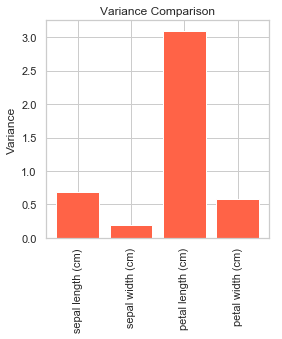

In [197]:
# Create a bar chart for visualizing the variances
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

By default, **VarianceThreshold** removes only zero-variance features. Zero-variance feature means that the feature has the same value in all instances. Suppose we want to eliminate features that have variance score below 0.2, we can specify *threshold* parameter.

In [198]:
# Create VarianceThreshold object to perform variance thresholding
selector = VarianceThreshold(threshold=0.2)

# Transform the dataset according to variance thresholding
X_data_new = selector.fit_transform(X_data)

# Print the results
print('Number of features before variance thresholding: {}'.format(X_data.shape[1]))
print('Number of features after variance thresholding: {}'.format(X_data_new.shape[1]))

Number of features before variance thresholding: 4
Number of features after variance thresholding: 3


As we can see, **VarianceThreshold** automatically eliminate features that have variance below 0.2. In this case, it removes **sepal width**, which has 0.188 variance. 

<a id='section 1.3.'></a>

## 1.3. Mutual Information
Mutual information (MI) measures the dependence of one variable to another by quantifying the amount of information obtained about one feature, through the other feature. MI is symmetric and non-negative, and is zero if and only if the input and output feature are independent. Unlike ANOVA F-value, mutual information can capture non-linear relationships between input and output feature.

We can use Scikit-learn to calculate MI. Scikit-learn has two functions to calculate MI:
- **mutual_info_classif**, which calculate MI for classification task
- **mutual_info_regression**, which calculate MI for regression task 

We will use **mutual_info_classif** because the Iris dataset entails a classification task.

In [199]:
# Import mutual_info_classif from Scikit-learn
from sklearn.feature_selection import mutual_info_classif

Then, we calculate MI by calling the following:

In [200]:
# Create mutual_info_classif object to calculate mutual information
MI_score = mutual_info_classif(X_data, y_data, random_state=0)

# Print the name and mutual information score of each feature
for feature in zip(feature_names, MI_score):
    print(feature)

('sepal length (cm)', 0.4738732342805525)
('sepal width (cm)', 0.28607227699171767)
('petal length (cm)', 0.9895851732491787)
('petal width (cm)', 0.9749379656705233)


Let's visualize the results by creating a bar chart:

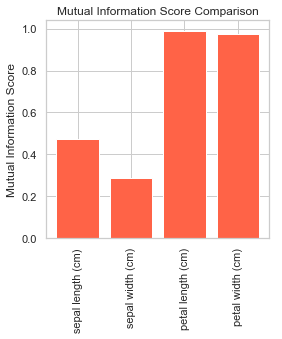

In [201]:
# Create a bar chart for visualizing the mutual information scores
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')

plt.show()

## 1.4. Using Selector Object for Selecting Features
We can use **SelectKBest** from Scikit-learn to select features according to the k highest scores, determined by a filter method. First, we need to import **SelectKBest**. 

In [202]:
# Import SelectKBest from Scikit-learn
from sklearn.feature_selection import SelectKBest

**SelectKBest** has two important parameters:
- *score_func*: the filter function that is used for feature selection 
- *k*: the number of top features to select 

Let's demonstrate **SelectKBest** by using ANOVA F-value as our filter method. We will select the top two features based on the ANOVA F-value.

In [203]:
# Create a SelectKBest object
skb = SelectKBest(score_func=f_classif, # Set f_classif as our criteria to select features
                  k=2)                  # Select top two features based on the criteria

# Train and transform the dataset according to the SelectKBest
X_data_new = skb.fit_transform(X_data, y_data)

# Print the results
print('Number of features before feature selection: {}'.format(X_data.shape[1]))
print('Number of features after feature selection: {}'.format(X_data_new.shape[1]))

Number of features before feature selection: 4
Number of features after feature selection: 2


As we can see, **SelectKBest** automatically eliminate two features that have the lowest F-value. 

We can identify the name of selected features by calling **get_support** method. 

In [204]:
# Print the name of the selected features
for feature_list_index in skb.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

- petal length (cm)
- petal width (cm)


An alternative of **SelectKBest** is to use **SelectPercentile**, which select features according to a percentile of the highest scores.

<a id='section 2.0.'></a>

# 2.0. Wrapper Methods
Wrapper methods try to find a subset of features that yield the best performance for a model by training, evaluating, and comparing the model with different combinations of features. Wrapper methods enable the detection of relationships among features. However, they can be computationally expensive, especially if the number of features is high. The risk of overfitting is also high if the number of instances in the dataset is insufficient. 

There are some diferrences between filter and wrapper methods:
- Filter methods do not incorporate a machine learning model in order to determine if a feature is good or bad whereas wrapper methods use a machine learning model and train it the feature to decide if it is essential or not.
- Filter methods are much faster compared to wrapper methods as they do not involve training the models. On the other hand, wrapper methods are computationally costly, and in the case of massive datasets, wrapper methods are not the most effective feature selection method to consider.
- Filter methods may fail to find the best subset of features in situations when there is not enough data to model the statistical correlation of the features, but wrapper methods can always provide the best subset of features because of their exhaustive nature.
- Using features from wrapper methods in your final machine learning model can lead to overfitting as wrapper methods already train machine learning models with the features and it affects the true power of learning. But the features from filter methods will not lead to overfitting in most of the cases.

We will discuss three wrapper methods:
1. [Exhaustive feature selection (EFS)](#section 2.1.)
2. [Sequential forward selection (SFS)](#section 2.2.)
3. [Sequential backward selection (SBS)](#section 2.3.)

Each will be discussed in the following.

<a id='section 2.1.'></a>

## 2.1. Exhaustive Feature Selection (EFS)
EFS finds the best subset of features by evaluating all feature combinations. Suppose we have a dataset with three features. EFS will evaluate the following feature combinations:
- *feature_1*
- *feature_2*
- *feature_3*
- *feature_1* and *feature_2*
- *feature_1* and *feature_3*
- *feature_2* and *feature_3*
- *feature_1*, *feature_2*, and *feature_3*

EFS selects a subset that generates the best performance (e.g., accuracy, precision, recall, etc.) of the model being considered.

Mlxtend provides **ExhaustiveFeatureSelector** function to perform EFS.

In [205]:
# Import ExhaustiveFeatureSelector from Mlxtend
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

EFS has five important parameters:
- *estimator*: the classifier that we intend to train
- *min_features*: the minimum number of features to select
- *max_features*: the maximum number of features to select
- *scoring*: the metric to use to evaluate the classifier
- *cv*: the number of cross-validations to perform

In this example, we use logistic regression as our classifier/estimator. 

In [206]:
# Import logistic regression from Scikit-learn
from sklearn.linear_model import LogisticRegression

Then, we perform EFS by calling the following:

In [207]:
# Create a logistic regression classifier
lr = LogisticRegression()

# Create an EFS object
efs = EFS(estimator=lr,        # Use logistic regression as the classifier/estimator
          min_features=1,      # The minimum number of features to consider is 1
          max_features=4,      # The maximum number of features to consider is 4
          scoring='accuracy',  # The metric to use to evaluate the classifier is accuracy 
          cv=5)                # The number of cross-validations to perform is 5

# Train EFS with our dataset
efs = efs.fit(X_data, y_data)

# Print the results
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
print('Best subset (indices):', efs.best_idx_)       # best_idx_ shows the index of features that yield the best score 
print('Best subset (corresponding names):', efs.best_feature_names_) # best_feature_names_ shows the feature names 
                                                                     # that yield the best score

Features: 15/15

Best accuracy score: 0.96
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


We can transform the dataset into a new dataset containing only the subset of features that generates the best score by using **transform** method.

In [208]:
# Transform the dataset
X_data_new = efs.transform(X_data)

# Print the results
print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

Number of features before transformation: 4
Number of features after transformation: 4


There is no difference between the dataset after and before the transformation because the subset that yields the best score include all of the features.

We can see the performance of each subset of features by calling **get_metric_dict**.

In [209]:
# Show the performance of each subset of features
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.533333,0.03832,"[0.5, 0.5666666666666667, 0.5, 0.5333333333333...","(1,)","(sepal width (cm),)",0.0298142,0.0149071
0,0.686667,0.079462,"[0.6333333333333333, 0.6666666666666666, 0.633...","(0,)","(sepal length (cm),)",0.0618241,0.0309121
4,0.766667,0.0898683,"[0.7666666666666667, 0.8, 0.6333333333333333, ...","(0, 1)","(sepal length (cm), sepal width (cm))",0.0699206,0.0349603
2,0.786667,0.0436915,"[0.7666666666666667, 0.8333333333333334, 0.733...","(2,)","(petal length (cm),)",0.0339935,0.0169967
3,0.853333,0.079462,"[0.8, 0.8333333333333334, 0.8, 0.8666666666666...","(3,)","(petal width (cm),)",0.0618241,0.0309121
9,0.866667,0.0898683,"[0.8666666666666667, 0.8333333333333334, 0.833...","(2, 3)","(petal length (cm), petal width (cm))",0.0699206,0.0349603
6,0.893333,0.0737099,"[0.8666666666666667, 0.9, 0.8333333333333334, ...","(0, 3)","(sepal length (cm), petal width (cm))",0.0573488,0.0286744
7,0.9,0.0605892,"[0.8666666666666667, 0.9, 0.8333333333333334, ...","(1, 2)","(sepal width (cm), petal length (cm))",0.0471405,0.0235702
11,0.906667,0.0737099,"[0.9333333333333333, 0.9, 0.8666666666666667, ...","(0, 1, 3)","(sepal length (cm), sepal width (cm), petal wi...",0.0573488,0.0286744
10,0.92,0.0209887,"[0.9333333333333333, 0.9333333333333333, 0.9, ...","(0, 1, 2)","(sepal length (cm), sepal width (cm), petal le...",0.0163299,0.00816497


Let's visualize the performance of each subset of features by creating a horizontal bar chart:

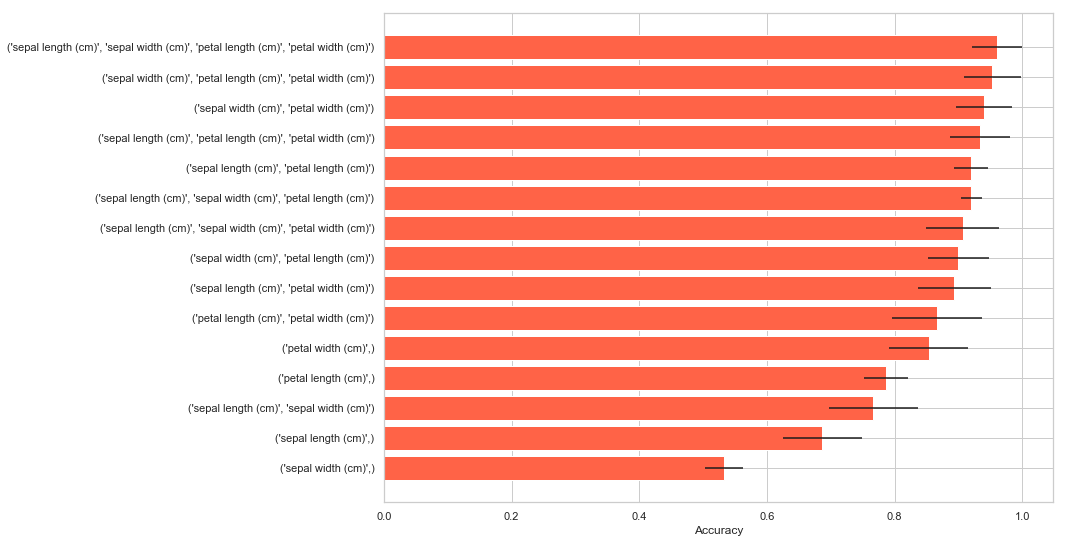

In [210]:
# Create a horizontal bar chart for visualizing 
# the performance of each subset of features
fig, ax = plt.subplots(figsize=(12,9))
y_pos = np.arange(len(efs_results))
ax.barh(y_pos, 
        efs_results['avg_score'],
        xerr=efs_results['std_dev'],
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(efs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

<a id='section 2.2.'></a>

## 2.2. Sequential Forward Selection (SFS)
SFS finds the best subset of feature by adding a feature that best improves the model at each iteration. 

Mlxtend provides **SequentialFeatureSelector** function to perform SFS.

In [211]:
# Import SequentialFeatureSelector from Mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

EFS has five important parameters:
- *estimator*: the classifier that we intend to train
- *k_features*: the number of features to select. A tuple containing a min and max value can be provided, and the SFS will consider return any feature combination between min and max that scored highest in cross-validtion.
- *forward*: use SFS if True and use SBS if False 
- *scoring*: the metric to use to evaluate the classifier
- *cv*: the number of cross-validations to perform

In this example, we use logistic regression as our classifier/estimator. 

In [212]:
# Create a logistic regression classifier
lr = LogisticRegression()

# Create an SFS object
sfs = SFS(estimator=lr,       # Use logistic regression as our classifier
          k_features=(1, 4),  # Consider any feature combination between 1 and 4
          forward=True,       # Set forward to True when we want to perform SFS
          scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
          cv=5)               # The number of cross-validations to perform is 5

# Train SFS with our dataset
sfs = sfs.fit(X_data, y_data)

# Print the results
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sfs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names 
                                                                  # that yield the best score

Best accuracy score: 0.96
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


We can transform the dataset into a new dataset containing only the subset of features that generates the best score by using **transform** method.

In [213]:
# Transform the dataset
X_data_new = sfs.transform(X_data)

# Print the results
print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

Number of features before transformation: 4
Number of features after transformation: 4


There is no difference between the dataset after and before the transformation because the subset that yields the best score include all of the features.

We can see the performance of each subset of features considered by SFS by calling **subsets_**.

In [214]:
# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T 
sfs_results

,avg_score,cv_scores,feature_idx,feature_names
1,0.853333,"[0.8, 0.8333333333333334, 0.8, 0.8666666666666...","(3,)","(petal width (cm),)"
2,0.94,"[0.9333333333333333, 0.9666666666666667, 0.866...","(1, 3)","(sepal width (cm), petal width (cm))"
3,0.953333,"[1.0, 0.9666666666666667, 0.9, 0.9, 1.0]","(1, 2, 3)","(sepal width (cm), petal length (cm), petal wi..."
4,0.96,"[1.0, 0.9666666666666667, 0.9333333333333333, ...","(0, 1, 2, 3)","(sepal length (cm), sepal width (cm), petal le..."


Let's visualize the performance of each subset of features by creating a horizontal bar chart:

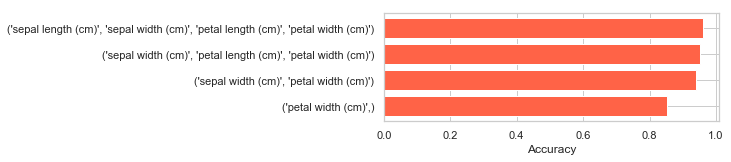

In [215]:
# Create a horizontal bar chart for visualizing 
# the performance of each subset of features
fig, ax = plt.subplots(figsize=(6,2))
y_pos = np.arange(len(sfs_results))
ax.barh(y_pos, 
        sfs_results['avg_score'], 
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sfs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

<a id='section 2.3.'></a>

### 2.3. Sequential Backward Selection (SBS)
SBS is the opposite of SFS. SBS starts with all features and removes the feature that has the least importance to the model at each iteration. 

To perform SBS use, we can use **SequentialFeatureSelector** by Mlxtend. This is the same function that we use to perform SFS. The different is we have to set the *k_features* parameter to False. 

In [216]:
# Create a logistic regression classifier
lr = LogisticRegression()

# Create an SBS object
sbs = SFS(estimator=lr,       # Use logistic regression as our classifier
          k_features=(1, 4),  # Consider any feature combination between 1 and 4
          forward=False,      # Set forward to False when we want to perform SBS
          scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
          cv=5)               # The number of cross-validations to perform is 5

# Train SBS with our dataset
sbs = sbs.fit(X_data.values, y_data, custom_feature_names=feature_names)

# Print the results
print('Best accuracy score: %.2f' % sbs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sbs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sbs.k_feature_names_) # k_feature_names_ shows the feature names 
                                                                  # that yield the best score

Best accuracy score: 0.96
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


We can transform the dataset into a new dataset containing only the subset of features that generates the best score by using **transform** method.

In [217]:
# Transform the dataset
X_data_new = sbs.transform(X_data)

# Print the results
print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

Number of features before transformation: 4
Number of features after transformation: 4


There is no difference between the dataset after and before the transformation because the subset that yields the best score include all of the features.

We can see the performance of each subset of features considered by SFS by calling **subsets_**.

In [218]:
# Show the performance of each subset of features considered by SBS
sbs_results = pd.DataFrame.from_dict(sbs.subsets_).T
sbs_results

,avg_score,cv_scores,feature_idx,feature_names
4,0.96,"[1.0, 0.9666666666666667, 0.9333333333333333, ...","(0, 1, 2, 3)","(sepal length (cm), sepal width (cm), petal le..."
3,0.953333,"[1.0, 0.9666666666666667, 0.9, 0.9, 1.0]","(1, 2, 3)","(sepal width (cm), petal length (cm), petal wi..."
2,0.94,"[0.9333333333333333, 0.9666666666666667, 0.866...","(1, 3)","(sepal width (cm), petal width (cm))"
1,0.853333,"[0.8, 0.8333333333333334, 0.8, 0.8666666666666...","(3,)","(petal width (cm),)"


Let's visualize the performance of each subset of features by creating a horizontal bar chart:

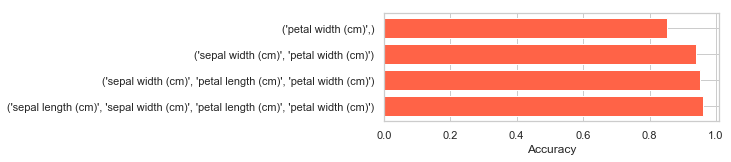

In [219]:
# Create a horizontal bar chart for visualizing 
# the performance of each subset of features
fig, ax = plt.subplots(figsize=(6,2))
y_pos = np.arange(len(sbs_results))
ax.barh(y_pos, 
        sbs_results['avg_score'], 
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sbs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

Let's compare the selection generated by EFS, SFS, and SBS.

In [220]:
# Compare the selection generated by EFS, SFS, and SBS
print('Best subset by EFS:', efs.best_feature_names_)
print('Best subset by SFS:', sfs.k_feature_names_)
print('Best subset by SBS:', sbs.k_feature_names_)

Best subset by EFS: ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
Best subset by SFS: ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
Best subset by SBS: ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


In this simple scenario, selecting the best combination of features out of the 4 available features in the Iris set, we end up with similar results regardless of which selection algorithms we used. In other cases with larger dataset and higher number of features, the selection is highly likely to be different for each selection algorithm.

<a id='section 3.0.'></a>

# 3.0. Embedded Methods
Embedded methods combine the strong points of filter and wrapper methods by taking advantage of machine algorithms that have their own built-in feature selection process. They integrate a feature selection step as a part of the training process (i.e., feature selection and training process are performed simultaneously). Embedded methods generally have a more efficient process than wrapper methods because they eliminate the need to retrain every single subset of features being examined. Some of machine algorithms that can be used for feature selection are:
- LASSO regression
- Ridge regression
- Decision tree
- Random forest
- Support vector machine

In the next section, we will focus on feature selection using random forest.

## 3.1. Feature Selection Using Random Forest
Random forest is one of the most popular learning algorithms used for feature selection in a data science workflow. As explained by Chris Albon:
>*"... the tree-based strategies used by random forests naturally ranks by how well they improve the purity of the node. This mean decrease in impurity over all trees (called gini impurity). Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features."*

To perform feature selection using random forest classifier, let's first import **RandomForestClassifier** from Scikit-learn.

In [221]:
# Import RandomForestClassifier from Scikit-learn
from sklearn.ensemble import RandomForestClassifier

We need to split our dataset into train and test split because the feature selection is a part of the training process. 

In [222]:
# Import train_test_split from Scikit-learn
from sklearn.model_selection import train_test_split

# Split the dataset into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

Please note that we use gini criterion to define feature importance. There are other criteria of importance, but we only limit our discussion to gini criterion.

In [223]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state=0, 
                             criterion='gini') # Use gini criterion to define feature importance

# Train the classifier
rfc.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_names, rfc.feature_importances_): 
    print(feature)

('sepal length (cm)', 0.1433448537384387)
('sepal width (cm)', 0.026480299171550252)
('petal length (cm)', 0.400583152709378)
('petal width (cm)', 0.4295916943806331)


If we add up all the importance scores, the result is 100%. As we can see, **petal length** and **petal width** correspond to 83% of the total importance score. They are clearly the most important features!

## 3.2. Using Selector Object for Selecting Features
We can use **SelectFromModel** from Scikit-learn to select features according to a threshold of feature importance. First, we need to import **SelectKBest**.

In [224]:
from sklearn.feature_selection import SelectFromModel

**SelectFromModel** has two important parameters:
- *estimator*: the machine learning algorithm used to select features
- *threshold*: the threshold value to use for feature selection. Features whose importance is greater or equal are kept while the others are discarded.

Let's demonstrate **SelectFromModel** by a random forest classifier with gini importance. We will select features that have importance above 0.2. 

In [225]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state=0, 
                             criterion='gini') # Use gini criterion to define feature importance

# Create a SelectFromModel object 
sfm = SelectFromModel(estimator=rfc, # Use random forest classifier to identify features
                      threshold=0.2) # that have an importance of more than 0.2

# Train the selector
sfm = sfm.fit(X_train, y_train)

# Print the names of the most important features
print('The most important features based on random forest classifier:')
for feature_list_index in sfm.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

The most important features based on random forest classifier:
- petal length (cm)
- petal width (cm)


We can transform the dataset into a new dataset containing only the most important features by using **transform** method.

In [226]:
# Transform the dataset
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Print the results
print('Number of features before transformation: {}'.format(X_train.shape[1]))
print('Number of features after transformation: {}'.format(X_important_train.shape[1]))

Number of features before transformation: 4
Number of features after transformation: 2


## 3.3. Comparing the Accuracy of Classifier with Full Features and with Limited Features
Let's compare the accuracy of a classifier with full features and a classifier with limited features (i.e., the top two important features based on random forest classifier).

In [228]:
# Import accuracy_score from Scikit-learn
from sklearn.metrics import accuracy_score

In [231]:
# Create a random forest classifier
rfc_full = RandomForestClassifier(random_state=0, criterion='gini')

# Train the classifier using dataset with full features
rfc_full.fit(X_train, y_train)

# Make predictions
pred_full = rfc_full.predict(X_test)

# Generate accuracy score
print('The accuracy of classifier with full features: {:.2f}'.format(accuracy_score(y_test, pred_full)))

The accuracy of classifier with full features: 0.98


In [232]:
# Create a random forest classifier
rfc_lim = RandomForestClassifier(random_state=0, criterion='gini')

# Train the classifier with limited features
rfc_lim.fit(X_important_train, y_train)

# Make predictions
pred_lim = rfc_lim.predict(X_important_test)

# Generate accuracy score
print('The accuracy of classifier with limited features: {:.2f}'.format(accuracy_score(y_test, pred_lim)))

The accuracy of classifier with limited features: 0.96


It can be seen that we can reduce the number of features without significantly reduce the performance of the model.

# References
This notebook cannot be created without the following references:

- [Feature Selection Using Random Forest by Chris Albon](https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/)
- [Why, How and When to apply Feature Selection](https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2)
- [Introduction to Feature Selection methods with an example](https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/)
- [An Introduction to Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/)
- [Beginner's Guide to Feature Selection in Python](https://www.datacamp.com/community/tutorials/feature-selection-python)
- [Sequential Feature Selector](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/)